<a href="https://colab.research.google.com/github/owills004/Nopel/blob/main/Kaggle_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# machine learning
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head(10)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
5,5,2.0,No,8.0,5.0,No,NaN,3.0,Extrovert
6,6,1.0,No,8.0,NaN,No,NaN,4.0,Extrovert
7,7,2.0,No,8.0,3.0,No,4.0,5.0,Extrovert
8,8,4.0,Yes,2.0,1.0,NaN,0.0,2.0,Introvert
9,9,1.0,No,8.0,6.0,No,14.0,9.0,Extrovert


In [4]:
y = data['Personality']
data.drop('Personality', axis=1, inplace=True)

In [5]:
y.head(5)

,Personality
0,Extrovert
1,Extrovert
2,Introvert
3,Extrovert
4,Extrovert


In [6]:
data.head(5)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0,0.0,No,6.0,4.0,No,15.0,5.0
1,1,1.0,No,7.0,3.0,No,10.0,8.0
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0
3,3,3.0,No,7.0,3.0,No,11.0,5.0
4,4,1.0,No,4.0,4.0,No,13.0,NaN


In [7]:
data.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.1+ MB


In [9]:
data.columns

Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency'],
      dtype='object')

In [10]:
useful_features = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']
train_data = data[useful_features]

In [11]:
train_X, val_X, train_y, val_y = train_test_split(data[useful_features], y, random_state=33, test_size=0.2)
train_X.head(5)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
4044,0.0,No,5.0,5.0,No,15.0,4.0
4275,3.0,No,5.0,4.0,No,12.0,3.0
4647,9.0,Yes,1.0,1.0,Yes,5.0,NaN
15043,3.0,No,9.0,5.0,No,8.0,7.0
3827,2.0,No,8.0,5.0,No,9.0,NaN


In [12]:
numerical_cols = train_data.select_dtypes(include=np.number).columns.tolist()
numerical_cols

['Time_spent_Alone',
 'Social_event_attendance',
 'Going_outside',
 'Friends_circle_size',
 'Post_frequency']

In [13]:
categorical_cols = train_data.select_dtypes(exclude=np.number).columns.tolist()
categorical_cols

['Stage_fear', 'Drained_after_socializing']

In [14]:
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')
ohe_encoder = OneHotEncoder(handle_unknown='ignore')

# imputing numerical dataframes
imputed_train_X = pd.DataFrame(num_imputer.fit_transform(train_X[numerical_cols]),
                               columns=numerical_cols)
imputed_val_X = pd.DataFrame(num_imputer.transform(val_X[numerical_cols]),
                             columns=numerical_cols)

# imputing categorical cols and one hot encode cat columns

# imputing cat cols
imputed_cat_train_X = pd.DataFrame(cat_imputer.fit_transform(train_X[categorical_cols]),
                                   columns=categorical_cols)
imputed_cat_val_X = pd.DataFrame(cat_imputer.transform(val_X[categorical_cols]),
                                 columns=categorical_cols)
# encoding
imputed_cat_train_X = pd.DataFrame(ohe_encoder.fit_transform(imputed_cat_train_X).toarray(),
                                   columns=ohe_encoder.get_feature_names_out())
imputed_cat_val_X = pd.DataFrame(ohe_encoder.transform(imputed_cat_val_X).toarray(),
                                 columns=ohe_encoder.get_feature_names_out())

In [15]:
imputed_train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14819 entries, 0 to 14818
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time_spent_Alone         14819 non-null  float64
 1   Social_event_attendance  14819 non-null  float64
 2   Going_outside            14819 non-null  float64
 3   Friends_circle_size      14819 non-null  float64
 4   Post_frequency           14819 non-null  float64
dtypes: float64(5)
memory usage: 579.0 KB


In [16]:
# concat train data together
imputed_train_X = pd.concat([imputed_train_X, imputed_cat_train_X], axis=1)
imputed_val_X = pd.concat([imputed_val_X, imputed_cat_val_X], axis=1)

In [17]:
imputed_train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14819 entries, 0 to 14818
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time_spent_Alone               14819 non-null  float64
 1   Social_event_attendance        14819 non-null  float64
 2   Going_outside                  14819 non-null  float64
 3   Friends_circle_size            14819 non-null  float64
 4   Post_frequency                 14819 non-null  float64
 5   Stage_fear_No                  14819 non-null  float64
 6   Stage_fear_Yes                 14819 non-null  float64
 7   Drained_after_socializing_No   14819 non-null  float64
 8   Drained_after_socializing_Yes  14819 non-null  float64
dtypes: float64(9)
memory usage: 1.0 MB


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

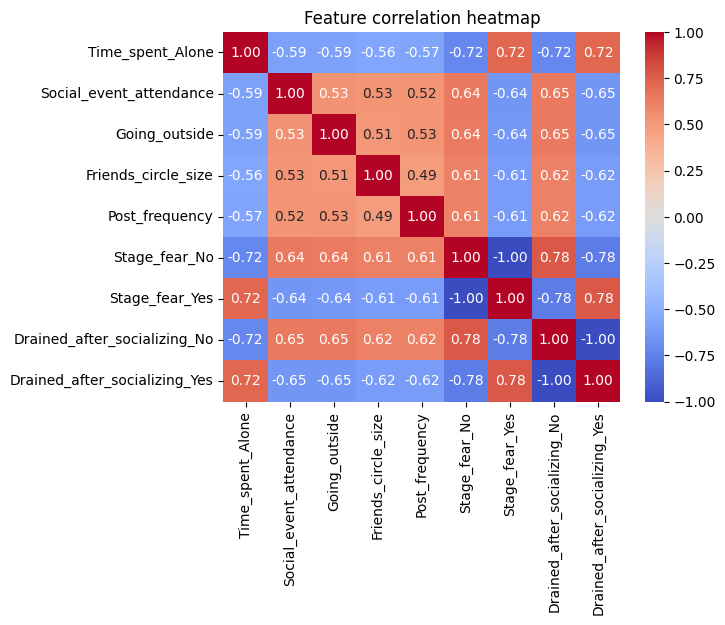

In [19]:
sns.heatmap(imputed_train_X.corr(), annot=True,
           cmap='coolwarm', fmt = '.2f')
plt.title("Feature correlation heatmap")
plt.show()

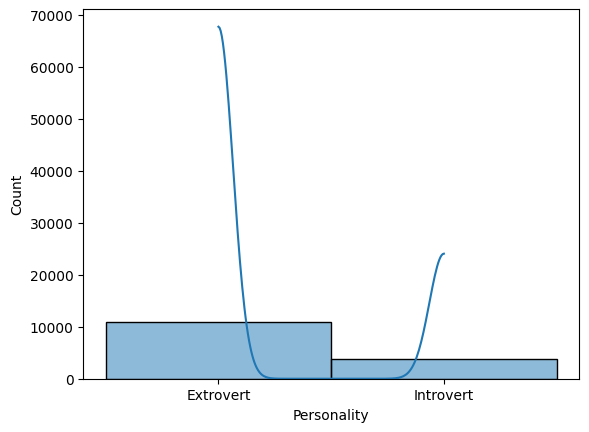

In [20]:
sns.histplot(train_y, kde=True)
plt.show()

In [22]:
def add_features(df):
        # Boolean: Socially active
        df['Is_Socially_Active'] = (df['Social_event_attendance'] + df['Going_outside']) > 6

        # Boolean: Needs recharge after socializing
        df['Needs_Social_Recharge'] = df['Drained_after_socializing_Yes'] == 1

        # Boolean: Prefers solitude
        df['Prefers_Solitude'] = (df['Time_spent_Alone'] > 7) & (df['Drained_after_socializing_Yes'] == 1)

        # Composite: Social Engagement Score (extrovert indicator)
        df['Social_Engagement_Score'] = (
            0.3 * df['Social_event_attendance'] +
            0.2 * df['Going_outside'] +
            0.3 * df['Post_frequency'] +
            0.2 * df['Friends_circle_size']
        )

        # Composite: Social Avoidance Score (introvert indicator)
        df['Social_Avoidance_Score'] = (
            0.4 * df['Time_spent_Alone'] +
            0.3 * df['Stage_fear_Yes'] +
            0.3 * df['Drained_after_socializing_Yes']
        )

        # Convert booleans to integers
        df['Is_Socially_Active'] = df['Is_Socially_Active'].astype(int)
        df['Needs_Social_Recharge'] = df['Needs_Social_Recharge'].astype(int)
        df['Prefers_Solitude'] = df['Prefers_Solitude'].astype(int)

        return df

In [23]:
add_features(imputed_train_X)

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes,Is_Socially_Active,Needs_Social_Recharge,Prefers_Solitude,Social_Engagement_Score,Social_Avoidance_Score
0,0.000000,5.0,5.0,15.000000,4.000000,1.0,0.0,1.0,0.0,1,0,0,6.700000,0.000000
1,3.000000,5.0,4.0,12.000000,3.000000,1.0,0.0,1.0,0.0,1,0,0,5.600000,1.200000
2,9.000000,1.0,1.0,5.000000,4.990933,0.0,1.0,0.0,1.0,0,1,1,2.997280,4.200000
3,3.000000,9.0,5.0,8.000000,7.000000,1.0,0.0,1.0,0.0,1,0,0,7.400000,1.200000
4,2.000000,8.0,5.0,9.000000,4.990933,1.0,0.0,1.0,0.0,1,0,0,6.697280,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14814,3.000000,8.0,6.0,7.992275,8.000000,1.0,0.0,1.0,0.0,1,0,0,7.598455,1.200000
14815,4.000000,6.0,3.0,8.000000,7.000000,1.0,0.0,1.0,0.0,1,0,0,6.100000,1.600000
14816,2.000000,9.0,5.0,7.000000,10.000000,1.0,0.0,1.0,0.0,1,0,0,8.100000,0.800000
14817,2.000000,6.0,7.0,7.000000,7.000000,1.0,0.0,1.0,0.0,1,0,0,6.700000,0.800000


In [24]:
add_features(imputed_val_X)

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes,Is_Socially_Active,Needs_Social_Recharge,Prefers_Solitude,Social_Engagement_Score,Social_Avoidance_Score
0,1.000000,6.0,7.000000,15.000000,5.0,1.0,0.0,1.0,0.0,1,0,0,7.700000,0.400000
1,3.143156,3.0,2.000000,3.000000,1.0,0.0,1.0,0.0,1.0,0,1,0,2.200000,1.857262
2,6.000000,1.0,0.000000,3.000000,0.0,0.0,1.0,0.0,1.0,0,1,0,0.900000,3.000000
3,3.000000,8.0,4.000000,9.000000,5.0,1.0,0.0,1.0,0.0,1,0,0,6.500000,1.200000
4,3.000000,10.0,4.000000,11.000000,8.0,1.0,0.0,1.0,0.0,1,0,0,8.400000,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,0.000000,7.0,5.000000,10.000000,4.0,1.0,0.0,1.0,0.0,1,0,0,6.300000,0.000000
3701,0.000000,8.0,6.000000,9.000000,7.0,1.0,0.0,1.0,0.0,1,0,0,7.500000,0.000000
3702,1.000000,7.0,4.039608,6.000000,5.0,1.0,0.0,1.0,0.0,1,0,0,5.607922,0.400000
3703,4.000000,7.0,4.000000,14.000000,3.0,1.0,0.0,1.0,0.0,1,0,0,6.600000,1.600000


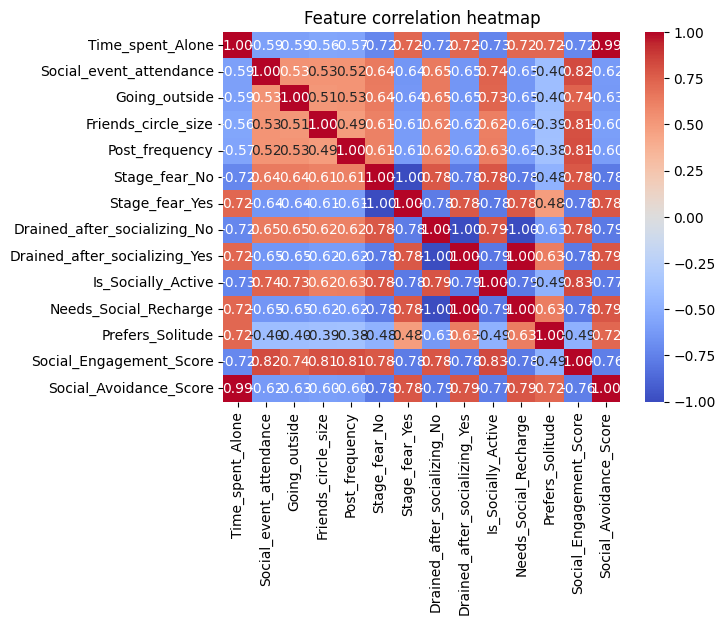

In [25]:
sns.heatmap(imputed_train_X.corr(), annot=True,
           cmap='coolwarm', fmt = '.2f')
plt.title("Feature correlation heatmap")
plt.show()

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import lightgbm as lgb

target_encoder = LabelEncoder()
y_train = target_encoder.fit_transform(train_y)
y_val = target_encoder.transform(val_y)


needed_features = ['Social_Engagement_Score', 'Social_Avoidance_Score',
                   'Is_Socially_Active', 'Needs_Social_Recharge', 'Prefers_Solitude',
                   'Stage_fear_Yes', 'Stage_fear_No', 'Drained_after_socializing_Yes',
                   'Drained_after_socializing_No']

rfc_model = RandomForestClassifier(random_state=33,
                              n_estimators=250,
                              max_depth=7,
                              min_samples_split=5,
                              min_samples_leaf=3,
                                   max_features = 'sqrt'

                                   )

"""
{'n_estimators': 200,
  'min_samples_split': 4,
  'min_samples_leaf': 1,
  'max_features': 'log2',
  'max_depth': 5,
  'bootstrap': False}

  {'n_estimators': 100,
  'min_samples_split': 6,
  'min_samples_leaf': 3,
  'max_features': 'sqrt',
  'max_depth': 10,
  'bootstrap': True}
  """

rfc_model.fit(imputed_train_X[needed_features], y_train)
rfc_prediction = rfc_model.predict(imputed_val_X[needed_features])
print(f"Accuracy score: {accuracy_score(y_val, rfc_prediction)}")
print(classification_report(y_val, rfc_prediction))

Accuracy score: 0.9735492577597841
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2764
           1       0.96      0.94      0.95       941

    accuracy                           0.97      3705
   macro avg       0.97      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



In [91]:
xgb_model = xgb.XGBClassifier(random_state=35,
                              n_estimators=250,
                              max_depth=5,
                              learning_rate=0.01,
                              subsample=0.6,
                              colsample_bytree=0.9,
                              eval_metric='logloss',
                              )

"""
{'subsample': 1.0,
  'n_estimators': 300,
  'max_depth': 3,
  'learning_rate': 0.2,
  'gamma': 0.1,
  'colsample_bytree': 0.6}
  """

xgb_model.fit(imputed_train_X[needed_features], y_train)
xgb_prediction = xgb_model.predict(imputed_val_X[needed_features])
print(f"Accuracy score: {accuracy_score(y_val, xgb_prediction)}")
print(classification_report(y_val, xgb_prediction))


Accuracy score: 0.9743589743589743
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2764
           1       0.96      0.94      0.95       941

    accuracy                           0.97      3705
   macro avg       0.97      0.96      0.97      3705
weighted avg       0.97      0.97      0.97      3705



In [109]:
lgbm_model = lgb.LGBMClassifier(random_state=22,
                              n_estimators=250,
                              max_depth=8,
                              learning_rate=0.01,
                              num_leaves=30,
                              subsample=0.6,
                              colsample_bytree=0.9,
                              )


"""
{'subsample': 0.8,
  'num_leaves': 31,
  'n_estimators': 300,
  'min_child_samples': 10,
  'max_depth': 7,
  'learning_rate': 0.01,
  'colsample_bytree': 0.6}
  """

lgbm_model.fit(imputed_train_X[needed_features], y_train)
lgbm_prediction = lgbm_model.predict(imputed_val_X[needed_features])
print(f"Accuracy score: {accuracy_score(y_val, lgbm_prediction)}")
print(classification_report(y_val, lgbm_prediction))

[LightGBM] [Info] Number of positive: 3884, number of negative: 10935
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 289
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262096 -> initscore=-1.035103
[LightGBM] [Info] Start training from score -1.035103
Accuracy score: 0.974089068825911
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2764
           1       0.96      0.94      0.95       941

    accuracy                           0.97      3705
   macro avg       0.97      0.96      0.97      3705
weighted avg       0.97      0.97      0.97      3705



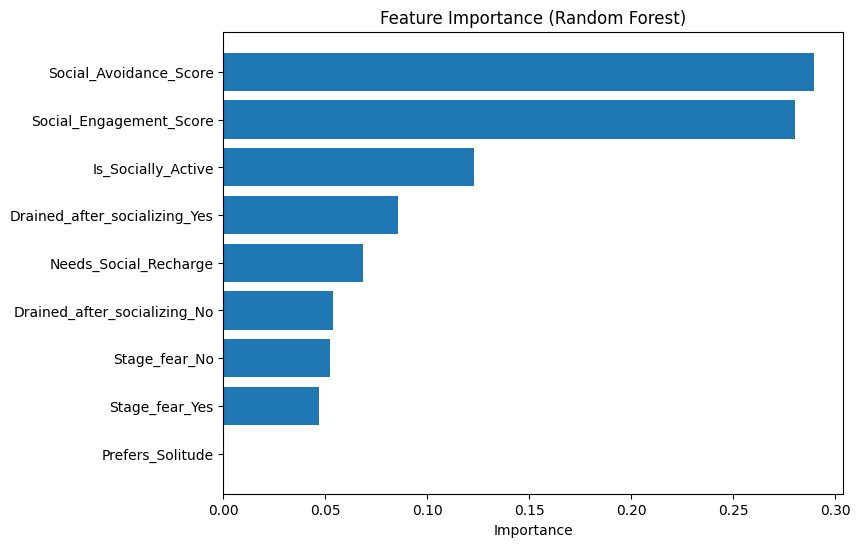

In [31]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rfc_model.feature_importances_
features = needed_features
sorted_idx = importances.argsort()

plt.figure(figsize=(8, 6))
plt.barh(range(len(importances)), importances[sorted_idx], align='center')
plt.yticks(range(len(importances)), [features[i] for i in sorted_idx])
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.show()


In [41]:
feat = ["Social_Avoidance_Score", "Social_Engagement_Score", "Is_Socially_Active"]
        #"Drained_after_socializing_Yes"]


rfc_model.fit(imputed_train_X[feat], y_train)
rfc_prediction = rfc_model.predict(imputed_val_X[feat])
print(f"Accuracy score: {accuracy_score(y_val, rfc_prediction)}")
print(classification_report(y_val, rfc_prediction))


Accuracy score: 0.9738191632928475
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2764
           1       0.96      0.94      0.95       941

    accuracy                           0.97      3705
   macro avg       0.97      0.96      0.97      3705
weighted avg       0.97      0.97      0.97      3705



In [76]:
lgbm_model.fit(imputed_train_X[feat], y_train)
lgbm_prediction = lgbm_model.predict(imputed_val_X[feat])
print(f"Accuracy score: {accuracy_score(y_val, lgbm_prediction)}")
print(classification_report(y_val, lgbm_prediction))

[LightGBM] [Info] Number of positive: 3884, number of negative: 10935
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000965 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 14819, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262096 -> initscore=-1.035103
[LightGBM] [Info] Start training from score -1.035103
Accuracy score: 0.9735492577597841
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2764
           1       0.96      0.94      0.95       941

    accuracy                           0.97      3705
   macro avg       0.97      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



In [111]:
from sklearn.model_selection import RandomizedSearchCV


"""
 param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 7, 10, 15],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}



def tune_random_forest(X, y, z):

    rf = RandomForestClassifier(random_state=42)

    rf_random = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_grid,
        n_iter=30,  # try 30 random combinations
        cv=5,
        verbose=1,
        random_state=42,
        n_jobs=-1,
        scoring='accuracy'
    )

    rf_random.fit(X, y)

    best_model = rf_random.best_estimator_
    best_params = rf_random.best_params_

    # Evaluate
    y_pred = best_model.predict(z)
    print("\n Tuned Random Forest Classification Report:")
    print(classification_report(y_val, y_pred))

    return best_model, best_params




lgb_param_grid = {
  'n_estimators': [100, 200, 300, 400],
  'max_depth': [5, 7, 10, -1],  # -1 means no limit
  'learning_rate': [0.01, 0.05, 0.1, 0.2],
  'num_leaves': [15, 31, 50],
  'min_child_samples': [10, 20, 30],
  'subsample': [0.6, 0.8, 1.0],
  'colsample_bytree': [0.6, 0.8, 1.0]
}


def tune_lightgbm(X, y, z):

    lgb_model = lgb.LGBMClassifier(random_state=42)

    lgb_random = RandomizedSearchCV(
        estimator=lgb_model,
        param_distributions=lgb_param_grid,
        n_iter=30,  # number of parameter sets to try
        cv=5,
        verbose=1,
        random_state=42,
        n_jobs=-1,
        scoring='accuracy'
    )

    lgb_random.fit(X, y)

    best_model = lgb_random.best_estimator_
    best_params = lgb_random.best_params_

    # Evaluate
    y_pred = best_model.predict(z)
    print("\nTuned LightGBM Classification Report:")
    print(classification_report(y_val, y_pred))

    return best_model, best_params




xgb_param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}


def tune_xgboost(X, y, z):

    xgb_model = xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )

    xgb_random = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=xgb_param_grid,
        n_iter=30,
        cv=5,
        verbose=1,
        random_state=42,
        n_jobs=-1,
        scoring='accuracy'
    )

    xgb_random.fit(X, y)

    best_model = xgb_random.best_estimator_
    best_params = xgb_random.best_params_

    # Evaluate
    y_pred = best_model.predict(z)
    print("\n Tuned XGBoost Classification Report:")
    print(classification_report(y_val, y_pred))

    return best_model, best_params

"""

In [114]:
#une_xgboost(imputed_train_X[feat], y_train, imputed_val_X[feat])